<a href="https://colab.research.google.com/github/romulokps/vacinasCOVID/blob/main/vacinasDownloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install elasticsearch

     |████████████████████████████████| 327kB 3.9MB/s 


In [1]:
from datetime import date
import os
caminho = '/content/drive/My Drive/dados/apivacinas/vacinas/'
from elasticsearch import Elasticsearch, helpers
import pandas as pd
from tqdm import tqdm
 
def write_row(res_list, csv_file, i, buffer_size):
    res_df = pd.DataFrame(res_list)
    if i <= buffer_size:
        res_df.to_csv(caminho + csv_file)
    else:
        res_df.to_csv(caminho + csv_file, mode='a', header=False)

def extract(cidade = ''):
    es = Elasticsearch('https://imunizacao-es.saude.gov.br/',
                    http_auth=('imunizacao_public', 'qlto5t&7r_@+#Tlstigi'))
 
    index = 'desc-imunizacao'
    if cidade == '':
      res_scan = helpers.scan(es, index = index, scroll = '30m', size = 10000)
      csv_file_name = 'vacinaas{}.csv.gz'.format(str(date.today()))
    else:
      res_scan = helpers.scan(es, index = index,query={"query": {"match": {"estabelecimento_municipio_codigo": cidade}}}, scroll = '30m', size = 10000)
      csv_file_name = '{}-{}.csv.gz'.format(cidade,str(date.today()))    
    print("Starting to extract data")
    
    buffer_size = 100000
    res_list = []
    i = 0
    for result in res_scan:
        res_list.append(result['_source'])
        i += 1
        if i % buffer_size == 0:
            write_row(res_list, csv_file_name, i, buffer_size)
            print("Written {} rows".format(i))
            res_list = []
    write_row(res_list, csv_file_name, i, buffer_size)  
    print("Finished to extract data for vacinas. Total rows: {}".format(i))
 
extract(250750) #jp

Starting to extract data
Finished to extract data for vacinas. Total rows: 35244


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dados/apivacinas/vacinas/250750-2021-02-28.csv.gz')
df

,Unnamed: 0,vacina_categoria_codigo,vacina_nome,vacina_lote,estabelecimento_razaoSocial,estalecimento_noFantasia,paciente_endereco_cep,estabelecimento_uf,sistema_origem,paciente_endereco_nmMunicipio,paciente_racaCor_valor,paciente_dataNascimento,vacina_fabricante_nome,estabelecimento_municipio_nome,paciente_idade,vacina_grupoAtendimento_codigo,vacina_descricao_dose,paciente_nacionalidade_enumNacionalidade,vacina_codigo,estabelecimento_municipio_codigo,@version,paciente_id,vacina_categoria_nome,vacina_dataAplicacao,document_id,@timestamp,paciente_enumSexoBiologico,estabelecimento_valor,paciente_endereco_uf,paciente_endereco_coPais,paciente_endereco_nmPais,paciente_endereco_coIbgeMunicipio,vacina_grupoAtendimento_nome,paciente_racaCor_codigo,vacina_fabricante_referencia,data_importacao_rnds
0,0,9,Covid-19-Coronavac-Sinovac/Butantan,202009011,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,58080,PB,Novo PNI,JOAO PESSOA,AMARELA,1985-10-09,FUNDACAO BUTANTAN,JOAO PESSOA,35,926,1ª Dose,B,86,250750,1,60512b335457ecf27f8cae247b27f4180aefb7ef223569...,Trabalhadores de Saúde,2021-01-29T03:00:00.000Z,f42292e7-2ac1-4407-86f3-76cf25878018-i0b0,2021-02-24T16:41:02.146Z,F,287660,PB,10,BRASIL,250750,Outros,4,Organization/61189445000156,NaN
1,1,2,Covid-19-Coronavac-Sinovac/Butantan,202009011,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,58055,PB,Novo PNI,JOAO PESSOA,PARDA,1938-01-06,FUNDACAO BUTANTAN,JOAO PESSOA,83,205,1ª Dose,B,86,250750,1,d55c9cd07429519b8279b26c4bed25d06569dfb2934944...,Faixa Etária,2021-02-08T03:00:00.000Z,ad79e535-ad54-471f-88ce-0946177cb661-i0b0,2021-02-24T16:04:34.751Z,M,287660,PB,10,BRASIL,250750,Pessoas de 80 anos ou mais,3,Organization/61189445000156,NaN
2,2,2,Covid-19-Coronavac-Sinovac/Butantan,202009011,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,58300,PB,Novo PNI,SANTA RITA,PARDA,1941-12-05,FUNDACAO BUTANTAN,JOAO PESSOA,79,204,1ª Dose,B,86,250750,1,f7d13e48cf534fb327bb0747c743733338434092a2e3a4...,Faixa Etária,2021-02-08T03:00:00.000Z,71b8ddb3-ab04-49d1-a83c-2d7f961505b6-i0b0,2021-02-24T16:41:27.368Z,M,287660,PB,10,BRASIL,251370,Pessoas de 75 a 79 anos,3,Organization/61189445000156,NaN
3,3,9,Covid-19-Coronavac-Sinovac/Butantan,202009011,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,58059,PB,Novo PNI,JOAO PESSOA,PARDA,1976-09-03,FUNDACAO BUTANTAN,JOAO PESSOA,44,923,1ª Dose,B,86,250750,1,5af5c4389d8d84fd194618f0e284a40632356be76ab2ef...,Trabalhadores de Saúde,2021-01-29T03:00:00.000Z,ae375b66-4118-4aae-879c-5e3b72f70b14-i0b0,2021-02-24T16:04:55.158Z,F,287660,PB,10,BRASIL,250750,Técnico de Enfermagem,3,Organization/61189445000156,NaN
4,4,9,Covid-19-Coronavac-Sinovac/Butantan,202009011,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,,PB,Novo PNI,JOAO PESSOA,BRANCA,1995-10-03,FUNDACAO BUTANTAN,JOAO PESSOA,25,912,1ª Dose,B,86,250750,1,19570a7e4913008edd2ed36888a060d1871aeade9d42f5...,Trabalhadores de Saúde,2021-01-20T00:00:00.000Z,f696946f-5bf9-4dd0-93e1-d5178b178739-i0b0,2021-02-24T16:19:48.216Z,M,287660,PB,10,BRASIL,250750,Médico,1,Organization/61189445000156,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35239,35239,9,Covid-19-Coronavac-Sinovac/Butantan,202009011,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,,PB,Novo PNI,JOAO PESSOA,SEM INFORMACAO,1972-05-02,FUNDACAO BUTANTAN,JOAO PESSOA,48,923,1ª Dose,B,86,250750,1,16d98af7b6c5ce3a8a86130bf827bbeaeed8f456ec8210...,Trabalhadores de Saúde,2021-01-21T00:00:00.000Z,50f73942-deac-4de8-a8a6-cbf1bfb22b50-i0b0,2021-02-26T17:21:43.709Z,F,287660,PB,10,BRASIL,250750,Técnico de Enfermagem,99,Organization/61189445000156,2021-01-29 17:33:26
35240,35240,9,Covid-19-Coronavac-Sinovac/Butantan,202009011,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,,PB,Novo PNI,JOAO PESSOA,AMARELA,1972-12-08,FUNDACAO BUTA

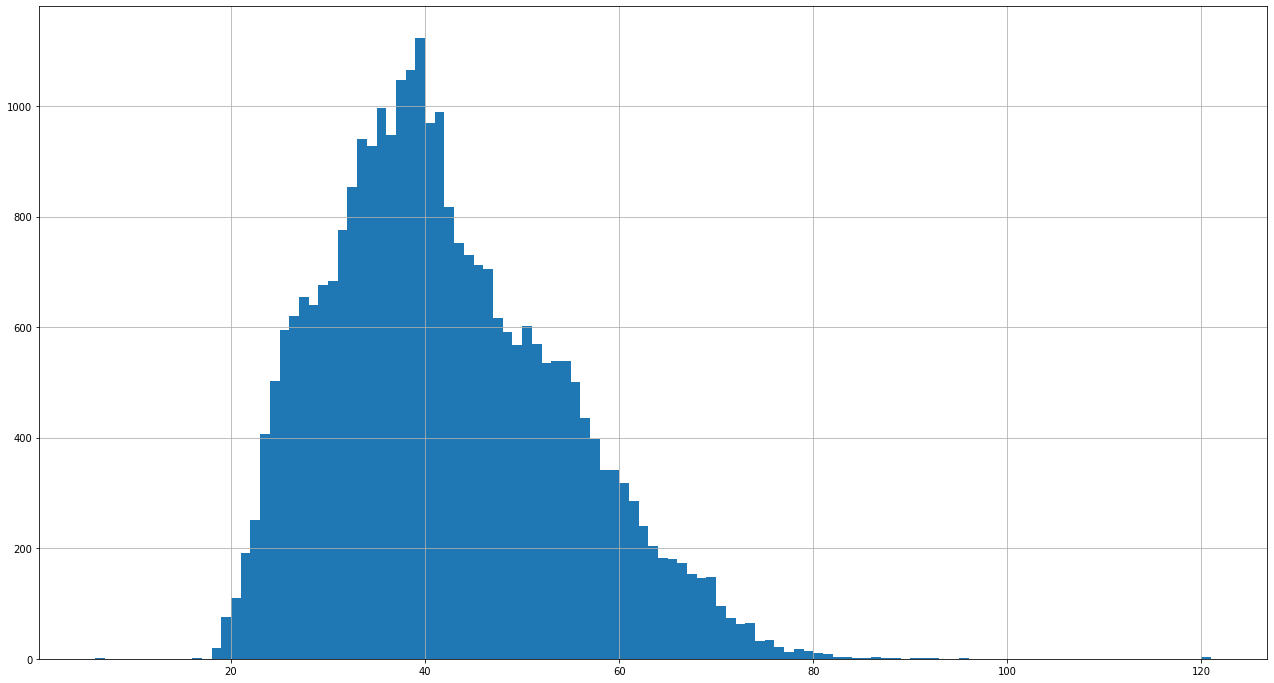

In [27]:
df[df['vacina_categoria_nome'] == 'Trabalhadores de Saúde']['paciente_idade'].hist(bins=115, figsize=(22,12))

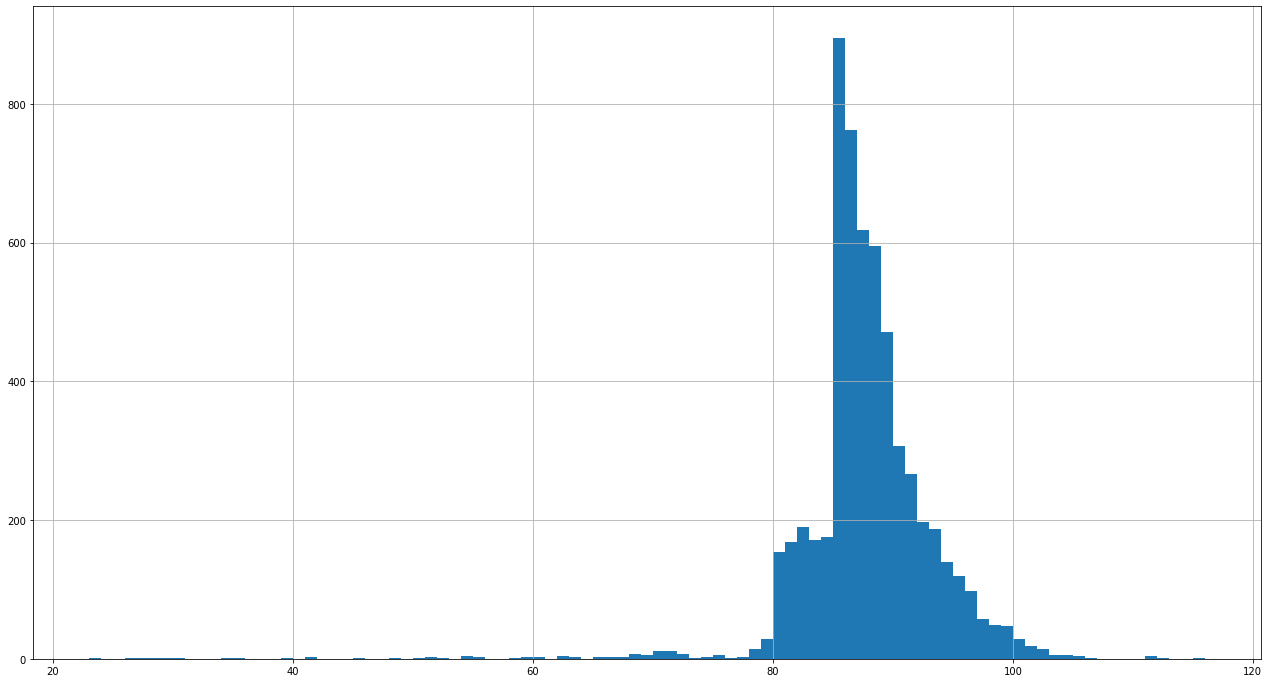

In [31]:
df[df['vacina_categoria_nome'] == 'Faixa Etária']['paciente_idade'].hist(bins=93,figsize=(22,12))